<a href="https://colab.research.google.com/github/mjpuma/FoodPriceCausation/blob/main/TigramitePredictionSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Prediction with PCMCI framework**
### **Mitchell Thomas, Michael J. Puma**
**International Research Institute for Climate and Society, Earth Insitute, Columbia University**

###**1. Set Parameters**  
* Key parameters include parameters that should be changed depending on basic goals of the test. 
* Additional test parameters give more direct control over the parameters of the study
* Display parameters allows control of printed outputs and graphs

**Note about Google Earth Engine:**
Google Earth Engine is a geospatial data processing tool that allows for up to date access of environmental variables. **However, it requires an authorization and login to proceed (free with academic use).** Set *use_gee* to *True* to use this functionality or *False* to use possibly outdated data. 


In [ ]:
# ---- key parameters ----
study_market = 'Dakar' # market to predict the time series of
country = 'Senegal' # country of study, optimized for senegal 
                    # but can choose any country/commodity pair at FPMA portal: https://fpma.apps.fao.org/giews/food-prices/tool/public/#/dataset/domestic
commodity = 'Millet' #commodity to study: optimized for 'Rice' or 'Millet' in Senegal 
add_enviro = True # whether or not to add environmental variables to study. (currently only available for Senegal)
use_gee =  True # use Google Earth Engine to obtain most up to date environmental time series.
                # If True, requires valid Earth Engine login. 
                # If False, data ends in April 2021.

# ---- additional test parameters -----
import pandas as pd
from datetime import date
s,e = pd.Timestamp(2007,1,1) , pd.Timestamp(date.today().year, date.today().month, 1) # start and end of calculation
min_lag, max_lag  = 1,4  # minimum and maximum lag of causal links
condition_on_my = True # whether to condition on month and year instead of directly correcting for these relations
study_variables = [] # optional list of markets to include as manual predictors to PC test
restrict_positive = True #whether or not to restrict linear regression weights to only positive values (recommend True). 
                          # (If so, environmental variables are multiplied by -1.)
interpolate = True # Interpolate time series (recommended for prediction)
max_gap= 3 # maximum gap to interpolate
minimum_size = 160 # minimum size of each price time series

# ---- display parameters
print_info = False # Whether or not to provide printed outputs for all steps of test
#print_graphs = True # print spatial and link graph

#if using Google Earth Engine to obtain up to date environmental data
import ee
if use_gee and not ee.data._credentials:
  ee.Authenticate()  # Trigger the authentication flow.
  ee.Initialize() # Initialize the library.

###**2. Apply Shocks**
Apply shocks on the time series to predict how it will adapt to changes. These shocks are set through a dictionary that maps a market or parameter to a z-score shift (0 is no shock).

In [ ]:

#shock_values is dict with form: { Variable1 (str) : (z_shift (float), shock_period (int) ), Variable2... }

#dictionary mapping markets to z-score shifts
#shock_values = {'Dakar': (1,12), 'Mumbai':(1,12),
#                'Sao Paolo': (1,12)}  
#shock_values = {'Kaolack': (1,12), 'Fatick':(1,12)}

#enviro_shocks
shock_values = {'ndvi': (2,12), 'precip': (2,12)}
                


###**3. Install Dependencies**

Install necessary packages and codes which are not included in Google Colab. Most source code is in the github for this project: https://github.com/mitchellthomas1/SenegalCodes.
This github is imported and stored as a local path.

In [ ]:
!pip install geopandas #install geopandas library
!pip install OSMPythonTools
!pip install -U scikit-learn
!rm -rf SenegalCodes/ # remove old version if needed
!git clone https://github.com/mitchellthomas1/SenegalCodes.git #clone files from github
import sys
sys.path.insert(0,'/content/SenegalCodes') #link those files to local system in google colab

from tigramitepredictionsupdated import run_pred_test

     |████████████████████████████████| 1.0MB 6.4MB/s 
     |████████████████████████████████| 15.3MB 252kB/s 
     |████████████████████████████████| 6.5MB 17.4MB/s 
     |████████████████████████████████| 184kB 8.7MB/s 
  Created wheel for OSMPythonTools: filename=OSMPythonTools-0.3.0-cp37-none-any.whl size=13025 sha256=6153798e416d521ba55634f0aae93a0f34d14b319bd2c21a3d655b7bbea3638f
  Stored in directory: /root/.cache/pip/wheels/8b/5b/c9/808660b16cb9745083a31339c69ec9776e09eb40f2164c6565
  Created wheel for pytest-sugar: filename=pytest_sugar-0.9.4-py2.py3-none-any.whl size=8971 sha256=e0aabd5b76d5cebbb0d7ead9ee993c87f74a9836efd892205c32cceed96bdf62
  Stored in directory: /root/.cache/pip/wheels/72/ac/7f/55050ee786fa4a2bb2d05dea0696eab826ff1d5b8a7dbd5883
Successfully built OSMPythonTools pytest-sugar
     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstall

###**4. Run Test**
Run test based on parameters set and display results



#### Target Value Predictors: #### 

Thies, lag = -1
Kaffrine_ndvi, lag = -3
Louga, lag = -1
Diourbel, lag = -4
Louga, lag = -3
Diourbel, lag = -1
Matam, lag = -1
Diourbel, lag = -2
Year, lag = -1
N---  19
test
coef:  [0.15251653 0.18317626 0.23639096 0.1267932  0.17237891 0.16334179
 0.08895177 0.07952392 0.        ]

##
## Predicting target 0
##
dataframe shape:  (171, 19)
Mask [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Mask Type y
(11, 28)

##
## Predicting target 0
##
dataframe shape:  (171, 19)
Mask [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Mas

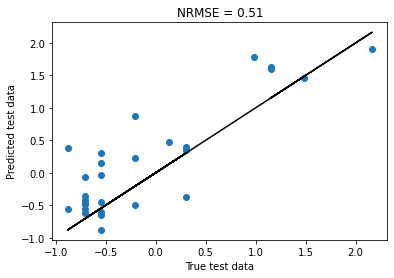

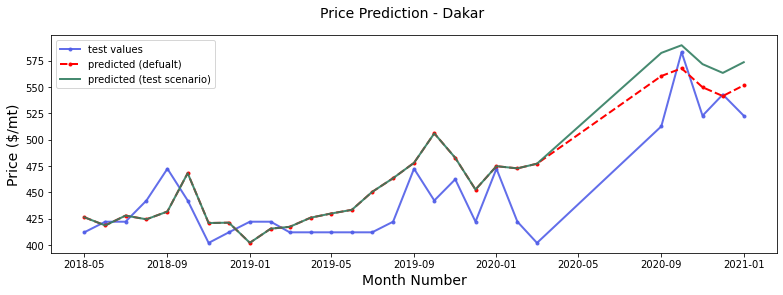

In [ ]:
### RUN TEST ###
run_pred_test(country, commodity, study_market, 
              min_lag,  max_lag, add_enviro, s, e, shock_values = shock_values,
              study_variables = study_variables, m_y_conditioning = condition_on_my, 
             interpolate = False, max_gap = 3, minimum_size = minimum_size, 
              print_info = print_info,  use_gee = use_gee)